In [1]:
import os
import glob
import netCDF4
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import gridspec
import cartopy.crs as ccrs
import cartopy.feature
import seaborn as sns

import wrf
from wrf import getvar
from cartopy.mpl.gridliner import LATITUDE_FORMATTER, LONGITUDE_FORMATTER
import matplotlib.ticker as mticker
import matplotlib.colors

In [2]:
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

NumPy version: 1.26.3
Pandas version: 2.2.1


In [3]:
###############################################################
# CHARGE SFC variables
###############################################################

#Parameters
folder_mod = '/capstor/scratch/cscs/gsergi/OUTPUT_PGW_20220315/ANT_20220315_'
domain = 'd01'
acc_t = 1440 #minutes
ini_date_idx=0
#end_date_idx=0

###load data###
outhist_files = '/outhist/outhist_'+domain+'_*'# Load netcdf

#hist
print('Charging Ant hist...')
wrflist_oh = []
proj = 'hist'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_hist = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] - 273.15
psl_ant_hist = wrf.getvar(wrflist_oh, 'PSFC', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] / 100
sic_ant_hist = wrf.getvar(wrflist_oh, 'SEAICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]
sic_ant_hist = wrf.getvar(wrflist_oh, 'SEAICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

#past
print('Charging Past hist...')
wrflist_oh = []
proj = 'past_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_past = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] - 273.15
psl_ant_past = wrf.getvar(wrflist_oh, 'PSFC', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] / 100
sic_ant_past = wrf.getvar(wrflist_oh, 'SEAICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

#ssp245
print('Charging ssp245 hist...')
wrflist_oh = []
proj = 'ssp245_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_ssp245 = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] - 273.15
psl_ant_ssp245 = wrf.getvar(wrflist_oh, 'PSFC', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] / 100
sic_ant_ssp245 = wrf.getvar(wrflist_oh, 'SEAICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

#ssp585
print('Charging ssp585 hist...')
wrflist_oh = []
proj = 'ssp585_new'
print('Total: ' + str(np.size(glob.glob(folder_mod+proj+outhist_files))))
for i,ncdf_oh in enumerate(np.sort(glob.glob(folder_mod+proj+outhist_files))):
        print(i, end="\r")
        wrflist_oh.append(netCDF4.Dataset(ncdf_oh))
    
# Get surface variables
t2_ant_ssp585 = wrf.getvar(wrflist_oh, 'T2', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] - 273.15
psl_ant_ssp585 = wrf.getvar(wrflist_oh, 'PSFC', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:] / 100
sic_ant_ssp585 = wrf.getvar(wrflist_oh, 'SEAICE', timeidx=wrf.ALL_TIMES)[ini_date_idx:,:,:]

######################
# ANT COORDINATES
# Get surface fix variables
height = wrf.getvar(wrflist_oh, 'HGT', timeidx=0, method="cat")[:,:]
# Get dimension
lats, lons = wrf.latlon_coords(t2_ant_hist)
times = wrf.extract_times(wrflist_oh, timeidx=wrf.ALL_TIMES)

Charging Ant hist...
Total: 59
Charging Past hist...
Total: 59
Charging ssp245 hist...
Total: 59
Charging ssp585 hist...
Total: 59


In [4]:
###############################################################
# CHARGE OBS variables
###############################################################

CON_Obs = pd.read_csv('~/Jupyter_notebooks/PGW_ANT_20220315/Observations/Concordia_20220301_20220331_TPHVD.txt', sep=r"\s+", parse_dates=[['DateTime', 'UTC']], index_col='DateTime_UTC')

/tmp/ipykernel_99752/4110781255.py:5: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  CON_Obs = pd.read_csv('~/Jupyter_notebooks/PGW_ANT_20220315/Observations/Concordia_20220301_20220331_TPHVD.txt', sep=r"\s+", parse_dates=[['DateTime', 'UTC']], index_col='DateTime_UTC')


In [5]:
#Positions
CON_xy = wrf.ll_to_xy(wrflist_oh, -75.09978, 123.332196) #Concordia
CON_ll = wrf.xy_to_ll(wrflist_oh, CON_xy[0], CON_xy[1])

#Positions
WIL_xy = wrf.ll_to_xy(wrflist_oh, -70.000, 130.000) #Wilkes
WIL_ll = wrf.xy_to_ll(wrflist_oh, WIL_xy[0], WIL_xy[1])

#Times mean
tini = np.where(times == np.datetime64('2022-03-17T00'))[0][0]
tend = np.where(times == np.datetime64('2022-03-20T00'))[0][0]

#Times Timeseries
tiniTS = np.where(times == np.datetime64('2022-03-10T00'))[0][0]
tendTS = np.where(times == np.datetime64('2022-03-25T00'))[0][0]

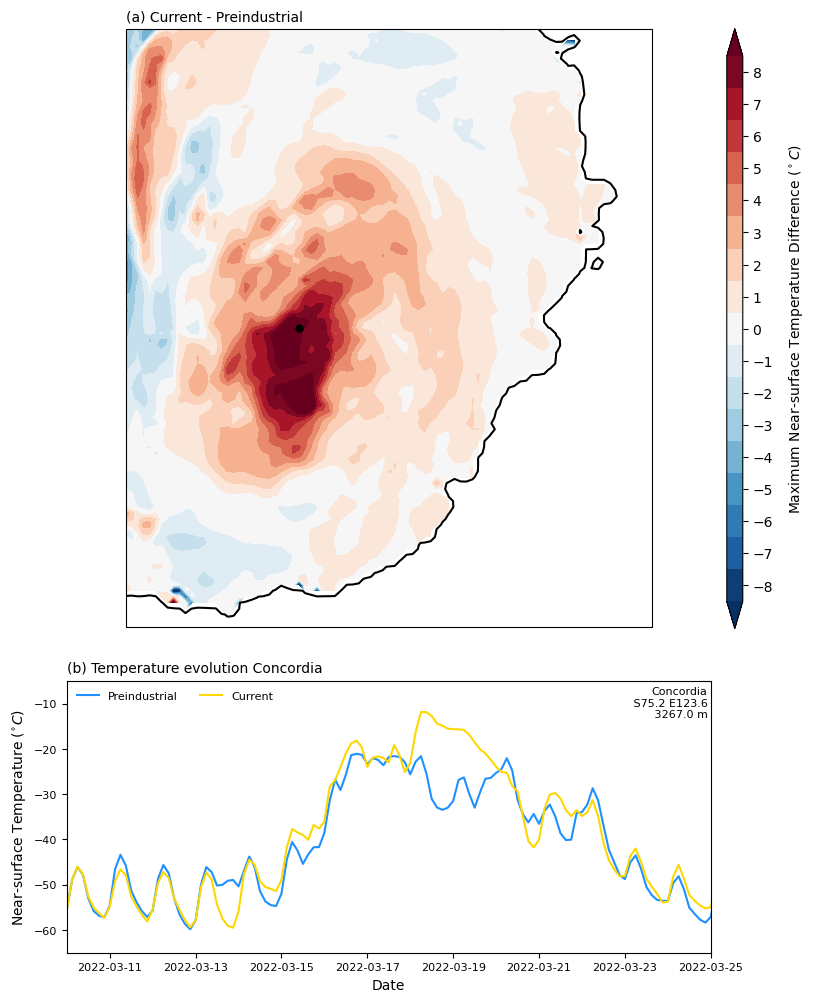

In [6]:
#############################################
# Plot terrein map
#############################################

min_height = 10
time_ini = 39
#time_ix = 40
  
######################################################
### Plot Starting
#Figure and axis
fig = plt.figure(figsize=[8,12])
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig, hspace= 0.2, wspace=0.1)

### Background
ax1 = fig.add_subplot(spec[:2, :2], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[2, :])

CS1 = ax1.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
ax1.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
ax1.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())

####################################################
#PLOT Variables
#Compute amplification HIST-PAST
#sp_T_diff_ini = wrf.to_np(t2_ant_hist[0,:,:].where(height > min_height)) - wrf.to_np(t2_ant_past[0,:,:].where(height > min_height))
sp_T_diff_max = np.max(wrf.to_np(t2_ant_hist[:,:,:].where(height > min_height)), axis=0) - np.max(wrf.to_np(t2_ant_past[:,:,:].where(height > min_height)), axis=0)
sp_T_diff_amplification = sp_T_diff_max
fill1 = ax1.contourf(sp_T_diff_amplification, levels=np.arange(-8.5,8.6,1), cmap='RdBu_r', extend="both")

#-------------------------------------------
#Temperature Concordia
ax2.plot(times, t2_ant_past[:,CON_xy[1],CON_xy[0]], c='DodgerBlue', label='Preindustrial')
ax2.plot(times, t2_ant_hist[:,CON_xy[1],CON_xy[0]], c='Gold', label='Current')

ax2.text(.995, .98, 'Concordia' + '\n S' + str(-np.round(CON_ll[0].values,1)) + ' E' + str(np.round(CON_ll[1].values,1)) + '\n ' + str(np.round(height[CON_xy[1], CON_xy[0]].values, 0)) + ' m',
    horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes, fontsize=8)
ax2.legend(ncol=2, loc='upper left', frameon=False, fontsize=8)

ax2.set_xlabel('Date')
ax2.set_ylabel('Near-surface Temperature ($^{\circ} C$)')
ax2.set_ylim(-65, -5)
ax2.set_xlim(times[tiniTS], times[tendTS])
ax2.tick_params(axis='both', which='major', labelsize=8)

####################################################
# PLOT Parameters
ax1.set_title('(a) Current - Preindustrial', loc='left', fontsize=10)
ax2.set_title('(b) Temperature evolution Concordia', loc='left', fontsize=10)

fig.subplots_adjust(right=0.93)
cbar_ax_1 = fig.add_axes([0.95, 0.38, 0.02, 0.5])
cbar_1 = fig.colorbar(fill1, cax=cbar_ax_1, orientation = 'vertical', shrink=0.5, pad=0)
cbar_1.set_label('Maximum Near-surface Temperature Difference ($^\circ C$)', labelpad=10)
cbar_1.set_ticks(np.arange(-8,8.1,1))

/tmp/ipykernel_99752/2600749039.py:32: RuntimeWarning: divide by zero encountered in divide
  sp_T_diff_amplification = (sp_T_diff_max)  / sp_T_diff_ini *100


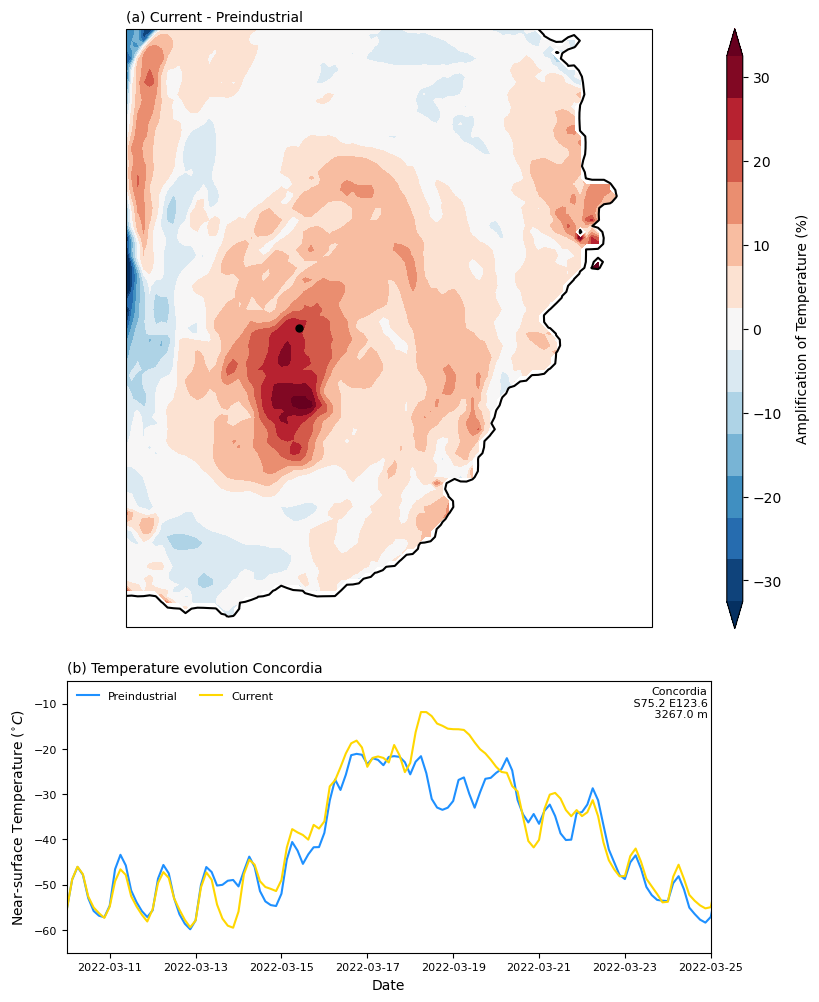

In [7]:
#############################################
# Plot terrein map
#############################################

min_height = 10
time_ini = 39
#time_ix = 40

time_ix_ini = np.where(times == np.datetime64('2022-03-15T00'))[0][0]
time_ix_end = np.where(times == np.datetime64('2022-03-20T00'))[0][0]
  
######################################################
### Plot Starting
#Figure and axis
fig = plt.figure(figsize=[8,12])
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig, hspace= 0.2, wspace=0.1)

### Background
ax1 = fig.add_subplot(spec[:2, :2], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[2, :])

CS1 = ax1.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
ax1.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
ax1.set_extent([132, 220, 30, 130], crs=ccrs.SouthPolarStereo())

####################################################
#PLOT Variables
#Compute amplification HIST-PAST
#sp_T_diff_ini = wrf.to_np(t2_ant_hist[0,:,:].where(height > min_height)) - wrf.to_np(t2_ant_past[0,:,:].where(height > min_height))
sp_T_diff_ini = np.max(wrf.to_np(t2_ant_hist[:,:,:].where(height > min_height)), axis=0) - wrf.to_np(t2_ant_hist[time_ix_ini,:,:].where(height > min_height))
sp_T_diff_max = np.max(wrf.to_np(t2_ant_hist[:,:,:].where(height > min_height)), axis=0) - np.max(wrf.to_np(t2_ant_past[:,:,:].where(height > min_height)), axis=0)
sp_T_diff_amplification = (sp_T_diff_max)  / sp_T_diff_ini *100
fill1 = ax1.contourf(sp_T_diff_amplification, levels=np.arange(-32.5,32.6,5), cmap='RdBu_r', extend="both")

#-------------------------------------------
#Temperature Concordia
ax2.plot(times, t2_ant_past[:,CON_xy[1],CON_xy[0]], c='DodgerBlue', label='Preindustrial')
ax2.plot(times, t2_ant_hist[:,CON_xy[1],CON_xy[0]], c='Gold', label='Current')

ax2.text(.995, .98, 'Concordia' + '\n S' + str(-np.round(CON_ll[0].values,1)) + ' E' + str(np.round(CON_ll[1].values,1)) + '\n ' + str(np.round(height[CON_xy[1], CON_xy[0]].values, 0)) + ' m',
    horizontalalignment='right', verticalalignment='top', transform=ax2.transAxes, fontsize=8)
ax2.legend(ncol=2, loc='upper left', frameon=False, fontsize=8)

ax2.set_xlabel('Date')
ax2.set_ylabel('Near-surface Temperature ($^{\circ} C$)')
ax2.set_ylim(-65, -5)
ax2.set_xlim(times[tiniTS], times[tendTS])
ax2.tick_params(axis='both', which='major', labelsize=8)

####################################################
# PLOT Parameters
ax1.set_title('(a) Current - Preindustrial', loc='left', fontsize=10)
ax2.set_title('(b) Temperature evolution Concordia', loc='left', fontsize=10)

fig.subplots_adjust(right=0.93)
cbar_ax_1 = fig.add_axes([0.95, 0.38, 0.02, 0.5])
cbar_1 = fig.colorbar(fill1, cax=cbar_ax_1, orientation = 'vertical', shrink=0.5, pad=0)
cbar_1.set_label('Amplification of Temperature (%)', labelpad=10)
cbar_1.set_ticks(np.arange(-30,30.1,10))

plt.savefig('Figure_1.png', dpi=300, bbox_inches = 'tight')

/tmp/ipykernel_99752/4108929034.py:40: RuntimeWarning: divide by zero encountered in divide
  sp_T_diff_amplification = (sp_T_diff_max)  / sp_T_diff_ini *100
/tmp/ipykernel_99752/4108929034.py:46: RuntimeWarning: divide by zero encountered in divide
  sp_T_diff_amplification = (sp_T_diff_max)  / sp_T_diff_ini *100


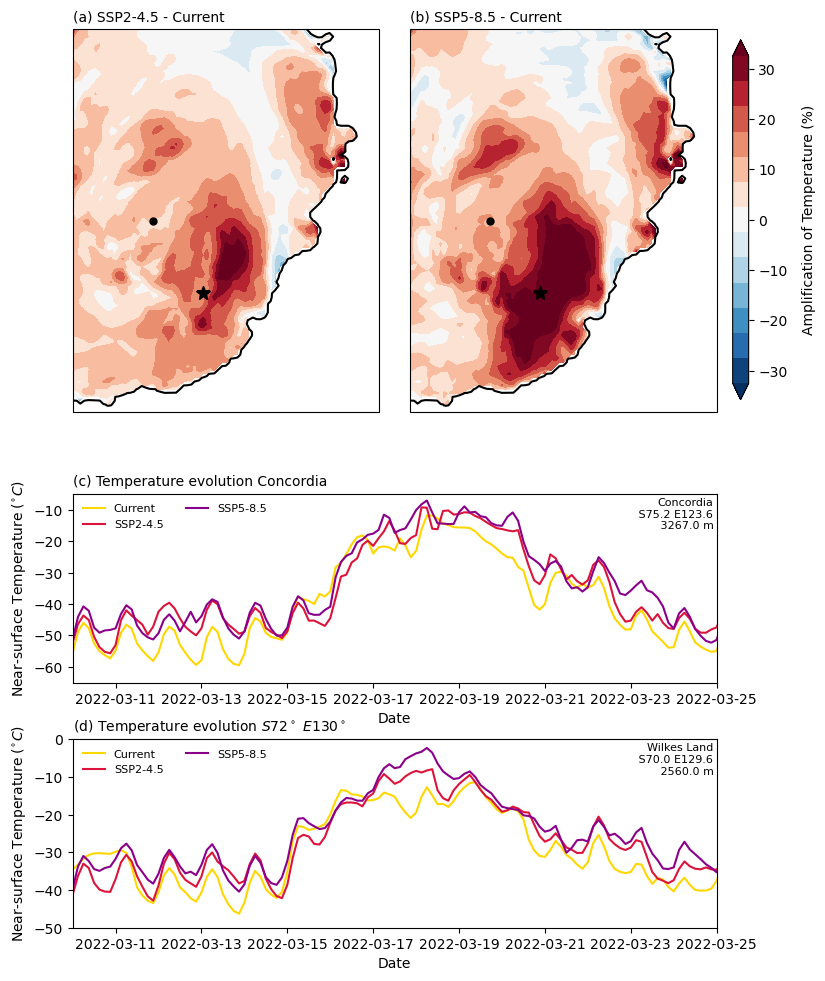

In [8]:
#############################################
# Plot terrein map
#############################################

min_height = 10
time_ini = 39
#time_ix = 40

time_ix_ini = np.where(times == np.datetime64('2022-03-15T00'))[0][0]
time_ix_end = np.where(times == np.datetime64('2022-03-20T00'))[0][0]
  
######################################################
### Plot Starting
#Figure and axis
fig = plt.figure(figsize=[8,12])
spec = gridspec.GridSpec(ncols=2, nrows=4, figure=fig, hspace= 0.3, wspace=0.1)

### Background
ax1 = fig.add_subplot(spec[:2, 0], projection=ccrs.SouthPolarStereo())
ax2 = fig.add_subplot(spec[:2, 1], projection=ccrs.SouthPolarStereo())
ax3 = fig.add_subplot(spec[2, :])
ax4 = fig.add_subplot(spec[3, :])

CS1 = ax1.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
CS2 = ax2.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")

ax1.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
ax2.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
ax1.plot(wrf.to_np(WIL_xy)[0], wrf.to_np(WIL_xy)[1], 'k*', markersize=10)
ax2.plot(wrf.to_np(WIL_xy)[0], wrf.to_np(WIL_xy)[1], 'k*', markersize=10)

ax1.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())
ax2.set_extent([140, 220, 30, 130], crs=ccrs.SouthPolarStereo())

####################################################
#PLOT Variables
#Compute amplification SSP245-HIST
sp_T_diff_ini = np.max(wrf.to_np(t2_ant_hist[:,:,:].where(height > min_height)), axis=0) - wrf.to_np(t2_ant_hist[time_ix_ini,:,:].where(height > min_height))
sp_T_diff_max = np.max(wrf.to_np(t2_ant_ssp245[:,:,:].where(height > min_height)), axis=0) - np.max(wrf.to_np(t2_ant_hist[:,:,:].where(height > min_height)), axis=0)
sp_T_diff_amplification = (sp_T_diff_max)  / sp_T_diff_ini *100
fill1 = ax1.contourf(sp_T_diff_amplification, levels=np.arange(-32.5,32.6,5), cmap='RdBu_r', extend="both")

#Compute amplification SSP585-HIST
sp_T_diff_ini = np.max(wrf.to_np(t2_ant_hist[:,:,:].where(height > min_height)), axis=0) - wrf.to_np(t2_ant_hist[time_ix_ini,:,:].where(height > min_height))
sp_T_diff_max = np.max(wrf.to_np(t2_ant_ssp585[:,:,:].where(height > min_height)), axis=0) - np.max(wrf.to_np(t2_ant_hist[:,:,:].where(height > min_height)), axis=0)
sp_T_diff_amplification = (sp_T_diff_max)  / sp_T_diff_ini *100
fill1 = ax2.contourf(sp_T_diff_amplification, levels=np.arange(-32.5,32.6,5), cmap='RdBu_r', extend="both")

#-------------------------------------------
#Temperature Concordia
ax3.plot(times, t2_ant_hist[:,CON_xy[1],CON_xy[0]], c='Gold', label='Current')
#ax4.plot(CON_Obs.index.values, CON_Obs['Temp'].values, c='Gray', label='Observations', zorder=-10)
ax3.plot(times, t2_ant_ssp245[:,CON_xy[1],CON_xy[0]], c='Crimson', label='SSP2-4.5')
ax3.plot(times, t2_ant_ssp585[:,CON_xy[1],CON_xy[0]], c='DarkMagenta', label='SSP5-8.5')


ax3.text(.995, .98, 'Concordia' + '\n S' + str(-np.round(CON_ll[0].values,1)) + ' E' + str(np.round(CON_ll[1].values,1)) + '\n ' + str(np.round(height[CON_xy[1], CON_xy[0]].values, 0)) + ' m',
    horizontalalignment='right', verticalalignment='top', transform=ax3.transAxes, fontsize=8)
ax3.legend(ncol=2, loc='upper left', frameon=False, fontsize=8)

ax3.set_xlabel('Date')
ax3.set_ylabel('Near-surface Temperature ($^{\circ} C$)')
ax3.set_ylim(-65, -5)
ax3.set_xlim(times[tiniTS], times[tendTS])

#-------------------------------------------
#Temperature Wilkins Land
ax4.plot(times, t2_ant_hist[:,WIL_xy[1],WIL_xy[0]], c='Gold', label='Current')
#ax4.plot(CON_Obs.index.values, CON_Obs['Temp'].values, c='Gray', label='Observations', zorder=-10)
ax4.plot(times, t2_ant_ssp245[:,WIL_xy[1],WIL_xy[0]], c='Crimson', label='SSP2-4.5')
ax4.plot(times, t2_ant_ssp585[:,WIL_xy[1],WIL_xy[0]], c='DarkMagenta', label='SSP5-8.5')


ax4.text(.995, .98, 'Wilkes Land' + '\n S' + str(-np.round(WIL_ll[0].values,1)) + ' E' + str(np.round(WIL_ll[1].values,1)) + '\n ' + str(np.round(height[WIL_xy[1], WIL_xy[0]].values, 0)) + ' m',
    horizontalalignment='right', verticalalignment='top', transform=ax4.transAxes, fontsize=8)
ax4.legend(ncol=2, loc='upper left', frameon=False, fontsize=8)

ax4.set_xlabel('Date')
ax4.set_ylabel('Near-surface Temperature ($^{\circ} C$)')
ax4.set_ylim(-50, 0)
ax4.set_xlim(times[tiniTS], times[tendTS])

####################################################
# PLOT Parameters
ax1.set_title('(a) SSP2-4.5 - Current', loc='left', fontsize=10)
ax2.set_title('(b) SSP5-8.5 - Current', loc='left', fontsize=10)
ax3.set_title('(c) Temperature evolution Concordia', loc='left', fontsize=10)
ax4.set_title('(d) Temperature evolution $S 72^\circ \\ E 130^\circ$', loc='left', fontsize=10)

fig.subplots_adjust(right=0.93)
cbar_ax_1 = fig.add_axes([0.95, 0.55, 0.02, 0.30])
cbar_1 = fig.colorbar(fill1, cax=cbar_ax_1, orientation = 'vertical', shrink=0.5, pad=0)
cbar_1.set_label('Amplification of Temperature (%)', labelpad=10)
cbar_1.set_ticks(np.arange(-30,30.1,10))

plt.savefig('Figure_5.png', dpi=300, bbox_inches = 'tight')

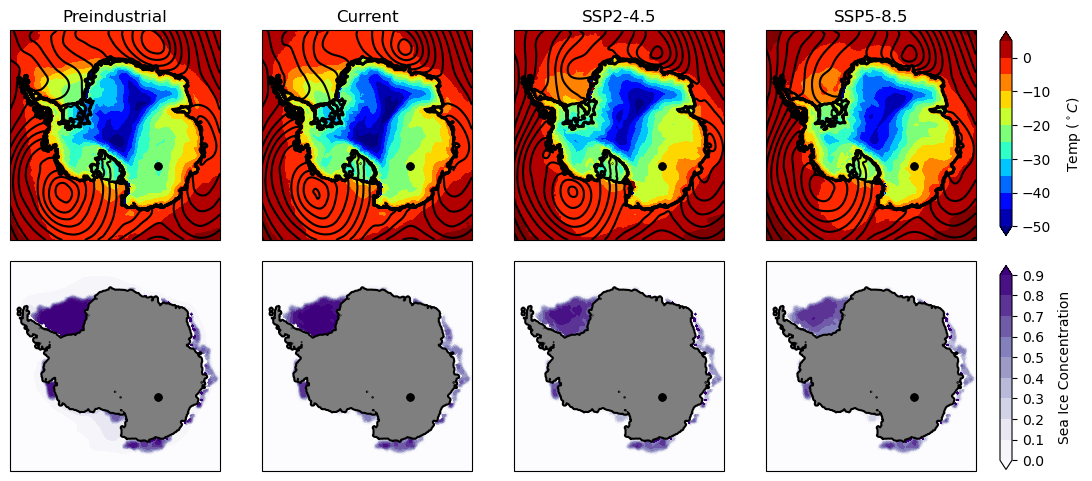

In [9]:
#############################################
# Plot SFC comparison scenarios
#############################################

min_height = 10
#time_ini = 39
time_ix = 0
  
#####################
### Plot T2 & PSL ###
#Figure and axis
fig = plt.figure(figsize=[12,6])

### Hist
ax1 = fig.add_subplot(2, 4, 1, projection=ccrs.SouthPolarStereo())
CS1 = ax1.contourf(wrf.to_np(t2_ant_past[tini:tend,:,:].mean(axis=0)), np.arange(-50,10,5), cmap="jet", extend="both")
CS1s = ax1.contour(wrf.to_np(psl_ant_past[tini:tend,:,:]).mean(axis=0), np.arange(950,1030,5), colors='k')

### Past
ax2 = fig.add_subplot(2, 4, 2, projection=ccrs.SouthPolarStereo())
CS2 = ax2.contourf(wrf.to_np(t2_ant_hist[tini:tend,:,:].mean(axis=0)), np.arange(-50,10,5), cmap="jet", extend="both")
CS2s = ax2.contour(wrf.to_np(psl_ant_hist[tini:tend,:,:]).mean(axis=0), np.arange(950,1030,5), colors='k')

### ssp245
ax3 = fig.add_subplot(2, 4, 3, projection=ccrs.SouthPolarStereo())
CS3 = ax3.contourf(wrf.to_np(t2_ant_ssp245[tini:tend,:,:].mean(axis=0)), np.arange(-50,10,5), cmap="jet", extend="both")
CS3s = ax3.contour(wrf.to_np(psl_ant_ssp245[tini:tend,:,:]).mean(axis=0), np.arange(950,1030,5), colors='k')

### ssp585
ax4 = fig.add_subplot(2, 4, 4, projection=ccrs.SouthPolarStereo())
CS4 = ax4.contourf(wrf.to_np(t2_ant_ssp585[tini:tend,:,:].mean(axis=0)), np.arange(-50,10,5), cmap="jet", extend="both")
CS4s = ax4.contour(wrf.to_np(psl_ant_ssp585[tini:tend,:,:]).mean(axis=0), np.arange(950,1030,5), colors='k')

#################
### Plot SIC ###
#Figure and axis
### Hist
ax5 = fig.add_subplot(2, 4, 5, projection=ccrs.SouthPolarStereo())
CS5 = ax5.contourf(wrf.to_np(sic_ant_past[tini:tend,:,:].mean(axis=0)), np.arange(0,1,.1), cmap="Purples", extend="both")

### Past
ax6 = fig.add_subplot(2, 4, 6, projection=ccrs.SouthPolarStereo())
CS6 = ax6.contourf(wrf.to_np(sic_ant_hist[tini:tend,:,:].mean(axis=0)), np.arange(0,1,.1), cmap="Purples", extend="both")

### ssp245
ax7 = fig.add_subplot(2, 4, 7, projection=ccrs.SouthPolarStereo())
CS7 = ax7.contourf(wrf.to_np(sic_ant_ssp245[tini:tend,:,:].mean(axis=0)), np.arange(0,1,.1), cmap="Purples", extend="both")

### ssp585
ax8 = fig.add_subplot(2, 4, 8, projection=ccrs.SouthPolarStereo())
CS8 = ax8.contourf(wrf.to_np(sic_ant_ssp585[tini:tend,:,:].mean(axis=0)), np.arange(0,1,.1), cmap="Purples", extend="both")


for ax,title in zip([ax1, ax2, ax3, ax4], ['Preindustrial','Current','SSP2-4.5','SSP5-8.5']):
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)
    ax.set_title(title)

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    ax.contour(wrf.to_np(height), np.arange(10,9000,8000), cmap="gray", extend="both")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)

for ax in [ax5, ax6, ax7, ax8]:
    ax.contourf(wrf.to_np(height), np.arange(10,9000,8000), cmap="binary", extend="max")
    ax.plot(wrf.to_np(CON_xy)[0], wrf.to_np(CON_xy)[1], 'k.', markersize=10)

#Remove frame
#ax1.axis('off')

#Initial data
#time_ix = time_ini
#fill1 = ax1.contourf(wrf.to_np(t2_ant_past[time_ix,0,:,:].where(height > min_height))*100, np.arange(0,20,2), cmap='Blues', extend="both")
fig.subplots_adjust(right=0.93)
cbar_ax_1 = fig.add_axes([0.95, 0.52, 0.01, 0.34])
cbar_ax_2 = fig.add_axes([0.95, 0.13, 0.01, 0.34])
cbar_1 = fig.colorbar(CS4, cax=cbar_ax_1, orientation = 'vertical', shrink=0.5, pad=0)
cbar_2 = fig.colorbar(CS8, cax=cbar_ax_2, orientation = 'vertical', shrink=0.5, pad=0)
cbar_1.set_label('Temp ($^\circ C$)', labelpad=10)
cbar_2.set_label('Sea Ice Concentration', labelpad=10)

fig.subplots_adjust(hspace=0)


#title1 = plt.title(str(times[time_ix])[:-16], fontsize=10)